In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image
from pathlib import Path  
from PIL import Image  
from wordcloud import WordCloud, ImageColorGenerator  
import jieba
from collections import Counter

In [213]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
sns.set(font='Arial Unicode MS', font_scale=1.0)

In [4]:
df = pd.read_csv('银河护卫队3_前30页.csv')

In [5]:
df

,页码,评论者昵称,评论星级,评论时间,评论者IP属地,有用数,评论内容
0,1,朝暮雪,4星,2023/5/5 4:19,四川,14762,《银护1》22：04出现过水獭的名字莱拉。至高进化给她装了机械臂，《复联3》火箭浣熊想要得到...
1,1,黑特-007,4星,2023/5/3 17:57,北京,5179,银护系列将因为发挥稳定而被踢出漫威宇宙，虽然我觉得为了讲火箭身世完全可以走迷你剧没必要又水一...
2,1,R人民艺术家,4星,2023/5/6 6:26,美国,4077,动森岛建不理想只能炸岛害
3,1,Agent阿神,5星,2023/4/30 0:16,山东,12554,很庆幸星爵没有和卡魔拉在一起，如果在一起，那就证明星爵从未爱过卡魔拉。几乎完美的结局，导演尊...
4,1,睦谊日东,5星,2023/5/3 10:07,韩国,6827,我就说最后一部高低得把第一部里面最经典的那首歌再放一次，果然给了，赞！
...,...,...,...,...,...,...,...
595,30,寒狐传媒,4星,2023/7/9 18:13,浙江,0,每个角色都不错。
596,30,M2,4星,2023/5/3 16:46,北京,0,近期漫威电影最佳。火箭的背景故事感人，多个长镜头动作场面华丽流畅，笑点与泪点分布舒适。缺点是...
597,30,一顿8汉堡,5星,2023/5/18 18:38,江苏,2,我爱火箭浣熊
598,30,Hi Friday,5星,2023/5/7 17:11,广东,1,还可以，四星电影吧，给五星情怀分了。很美好，看的还挺爽，甚至有的地方落泪了。虽然这反派还是有...


## The distribution about "评论星级"

In [6]:
df_star = df.groupby(['评论星级'])['评论星级'].count()

In [7]:
df_star

评论星级
1星     22
2星     40
3星    118
4星    192
5星    222
未知      6
Name: 评论星级, dtype: int64

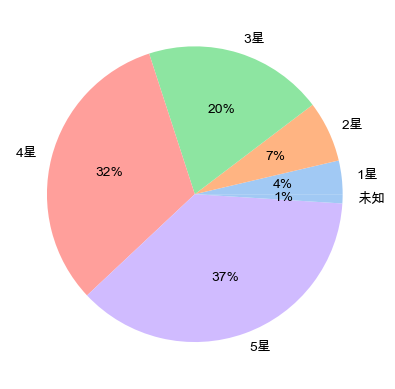

In [8]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_star, labels = df_star.index.tolist(), colors = colors, autopct='%.0f%%')
plt.show()

## The distribution about "评论时间"

In [9]:
df_date = df.copy()

In [10]:
df_date['评论时间']=pd.to_datetime(df_date['评论时间']).dt.strftime('%Y-%m')

In [11]:
month_count=df_date.groupby(['评论时间'])['评论时间'].count()

In [12]:
month_count.index

Index(['2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09',
       '2023-10'],
      dtype='object', name='评论时间')

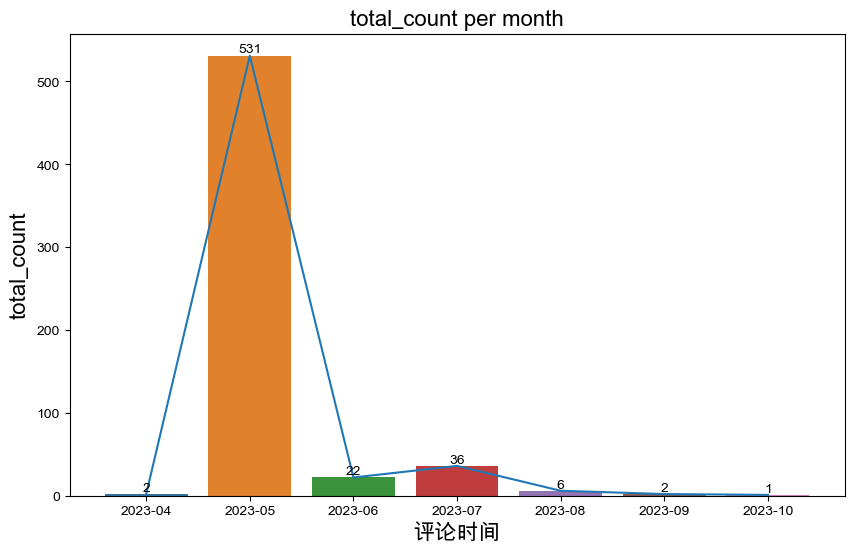

In [14]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('total_count per month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('total_count', fontsize=16)
ax1 = sns.barplot(x=month_count.index, y = list(month_count))
ax1.tick_params(axis='y')
ax1.bar_label(ax1.containers[0])
ax2 = sns.lineplot(x=month_count.index, y = list(month_count))
ax2.tick_params(axis='y')

## The distribution about "评论者IP属地"

In [15]:
area=df_date.groupby(['评论者IP属地'])['评论者IP属地'].count().sort_values(ascending=False)[:15]

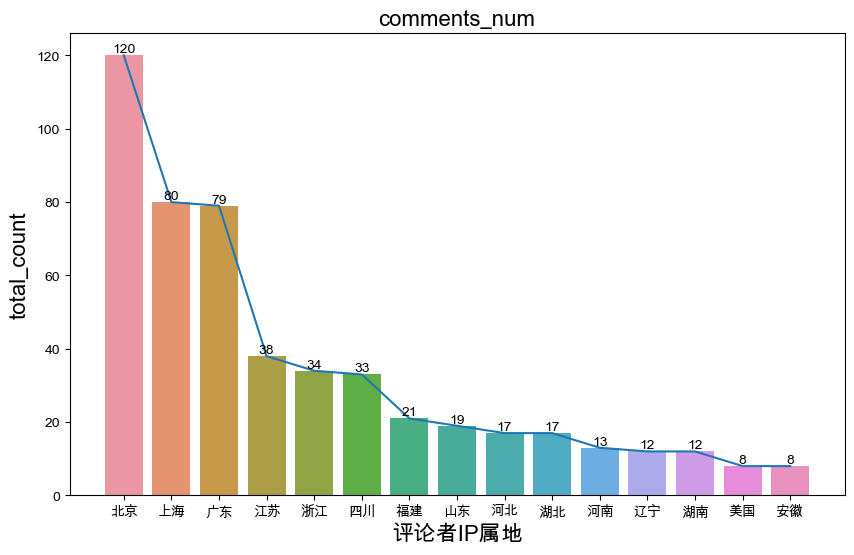

In [16]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('comments_num', fontsize=16)
ax1.set_xlabel('Area', fontsize=16)
ax1.set_ylabel('total_count', fontsize=16)
ax1 = sns.barplot(x=area.index, y = list(area))
ax1.tick_params(axis='y')
ax1.bar_label(ax1.containers[0])
ax2 = sns.lineplot(x=area.index, y = list(area))
ax2.tick_params(axis='y')

<AxesSubplot:xlabel='评论者IP属地', ylabel='count'>

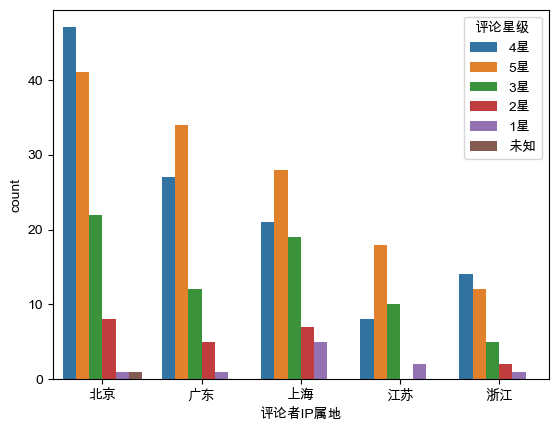

In [17]:
sns.countplot(x='评论者IP属地', hue = '评论星级', 
              data=df_date[df_date['评论者IP属地'].isin(['北京','上海','广东','江苏','浙江'])])

## The wordcloud about top5

In [18]:
df_date.sort_values(by=['有用数'],ascending=False).iloc[:5]

,页码,评论者昵称,评论星级,评论时间,评论者IP属地,有用数,评论内容
0,1,朝暮雪,4星,2023-05,四川,14762,《银护1》22：04出现过水獭的名字莱拉。至高进化给她装了机械臂，《复联3》火箭浣熊想要得到...
3,1,Agent阿神,5星,2023-04,山东,12554,很庆幸星爵没有和卡魔拉在一起，如果在一起，那就证明星爵从未爱过卡魔拉。几乎完美的结局，导演尊...
4,1,睦谊日东,5星,2023-05,韩国,6827,我就说最后一部高低得把第一部里面最经典的那首歌再放一次，果然给了，赞！
5,1,Aslp_,5星,2023-05,北京,5609,众所周知，滚导宇宙和MCU毫不相干，早已是nextlevel。
1,1,黑特-007,4星,2023-05,北京,5179,银护系列将因为发挥稳定而被踢出漫威宇宙，虽然我觉得为了讲火箭身世完全可以走迷你剧没必要又水一...


In [110]:
top5=df_date.sort_values(by=['有用数'],ascending=False).iloc[:5].reset_index()

In [95]:
stopwords = set()
content = [line.strip() for line in open('cn_stopwords.txt','r').readlines()]
stopwords.update(content)

In [103]:
def split_text(text):  

    words =jieba.cut(text)

    # 用Counter方法计算单词频率数
    count = Counter(words)
    most_count = count.most_common()
    words_list = []

    for i in most_count:
        if len(i[0]) == 2:
            words_list.append(i[0])

    return words_list

In [104]:
def draw_wordcloud(text):  
# draw_wordcloud函数用来画图


    wordcloud = WordCloud(background_color = 'white', 
                          max_words = 1000,
                          # 如果不设置中文字体，可能会出现乱码
                          stopwords=stopwords,
                          font_path = '/System/Library/Fonts/STHeiti Light.ttc')

    wordcloud.generate(text)


    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

In [111]:
text_list=[]
for i in range(5):
    text_list.append(split_text(text = df_date.iloc[i]['评论内容']))

In [112]:
text_final_list=[]
for i in range(5):
    text_raw=text_list[i]
    txt_final=''
    for txt in text_raw:
        txt_final+=txt
        txt_final+=','
    text_final_list.append(txt_final)

In [113]:
text_final_list

['银护,因为,机械,想要,大牙,跳舞,出现,莱拉,进化,火箭,浣熊,想起,假肢,眨眼,25,螳螂,女是,我们,22,04,水獭,名字,复联,得到,巴基,狱友,兔子,板板,勇度,手下,假眼,眼睛,改造,无法,自发,机器,控制,13,墙上,画像,可能,起来,之前,别人,27,伊戈,其中,一个,妻子,相同,种族,圣诞,证实,星爵,妹妹,两种,再次,只有,傻子,然而,结局,没有,台词,还是,一次,听懂,的话,已经,一员,',
 '系列,银护,因为,发挥,稳定,宇宙,虽然,觉得,为了,火箭,身世,完全,可以,迷你,必要,一部,电影,出来,结尾,说明,大家,知道,漫威,现在,这个,还算,出手,必须,一直,',
 '森岛,建不,理想,只能,',
 '星爵,一起,庆幸,没有,如果,证明,从未,爱过,几乎,完美,结局,导演,尊重,一位,银河,成员,主创,这些,角色,当作,独立,看待,不是,服务,剧情,工具,',
 '最后,一部,高低,里面,经典,再放,一次,果然,']

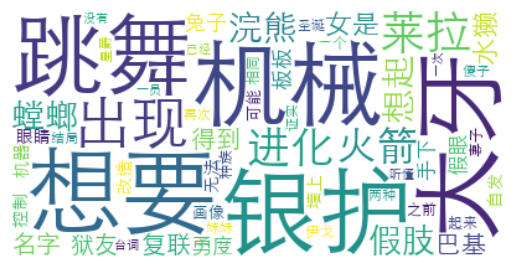

In [114]:
draw_wordcloud(text = text_final_list[0])  

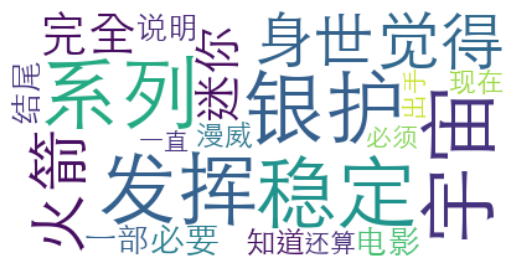

In [115]:
draw_wordcloud(text = text_final_list[1]) 

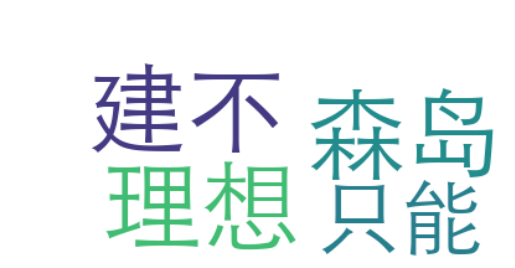

In [116]:
draw_wordcloud(text = text_final_list[2]) 

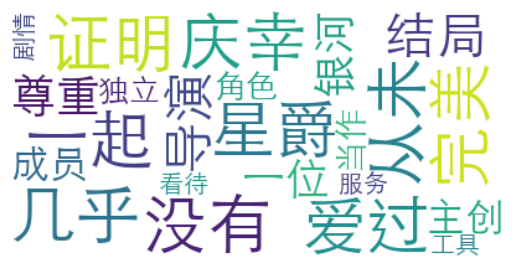

In [117]:
draw_wordcloud(text = text_final_list[3]) 

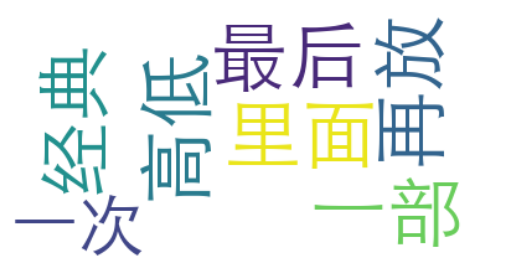

In [118]:
draw_wordcloud(text = text_final_list[4]) 

## The wordcloud about whole comments

In [120]:
df_date

,页码,评论者昵称,评论星级,评论时间,评论者IP属地,有用数,评论内容
0,1,朝暮雪,4星,2023-05,四川,14762,《银护1》22：04出现过水獭的名字莱拉。至高进化给她装了机械臂，《复联3》火箭浣熊想要得到...
1,1,黑特-007,4星,2023-05,北京,5179,银护系列将因为发挥稳定而被踢出漫威宇宙，虽然我觉得为了讲火箭身世完全可以走迷你剧没必要又水一...
2,1,R人民艺术家,4星,2023-05,美国,4077,动森岛建不理想只能炸岛害
3,1,Agent阿神,5星,2023-04,山东,12554,很庆幸星爵没有和卡魔拉在一起，如果在一起，那就证明星爵从未爱过卡魔拉。几乎完美的结局，导演尊...
4,1,睦谊日东,5星,2023-05,韩国,6827,我就说最后一部高低得把第一部里面最经典的那首歌再放一次，果然给了，赞！
...,...,...,...,...,...,...,...
595,30,寒狐传媒,4星,2023-07,浙江,0,每个角色都不错。
596,30,M2,4星,2023-05,北京,0,近期漫威电影最佳。火箭的背景故事感人，多个长镜头动作场面华丽流畅，笑点与泪点分布舒适。缺点是...
597,30,一顿8汉堡,5星,2023-05,江苏,2,我爱火箭浣熊
598,30,Hi Friday,5星,2023-05,广东,1,还可以，四星电影吧，给五星情怀分了。很美好，看的还挺爽，甚至有的地方落泪了。虽然这反派还是有...


In [126]:
textall=''
for i in range(df_date.shape[0]):
    tmplist=split_text(text = df_date.iloc[i]['评论内容'])
    for item in tmplist:
        textall+=item
        textall+=','

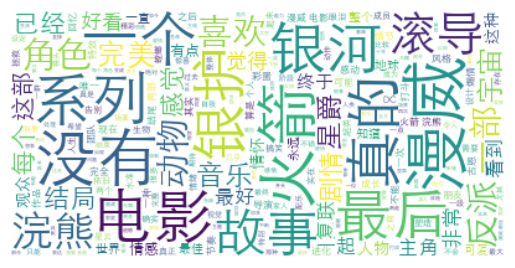

In [128]:
draw_wordcloud(text = textall)  

## The histogram about "有用数"

((0.19215686274509805, 0.5098039215686274, 0.7411764705882353), (0.4196078431372549, 0.6823529411764706, 0.8392156862745098), (0.6196078431372549, 0.792156862745098, 0.8823529411764706), (0.7764705882352941, 0.8588235294117647, 0.9372549019607843), (0.9019607843137255, 0.3333333333333333, 0.050980392156862744), (0.9921568627450981, 0.5529411764705883, 0.23529411764705882), (0.9921568627450981, 0.6823529411764706, 0.4196078431372549), (0.9921568627450981, 0.8156862745098039, 0.6352941176470588), (0.19215686274509805, 0.6392156862745098, 0.32941176470588235), (0.4549019607843137, 0.7686274509803922, 0.4627450980392157), (0.6313725490196078, 0.8509803921568627, 0.6078431372549019), (0.7803921568627451, 0.9137254901960784, 0.7529411764705882), (0.4588235294117647, 0.4196078431372549, 0.6941176470588235), (0.6196078431372549, 0.6039215686274509, 0.7843137254901961), (0.7372549019607844, 0.7411764705882353, 0.8627450980392157), (0.8549019607843137, 0.8549019607843137, 0.9215686274509803), (0

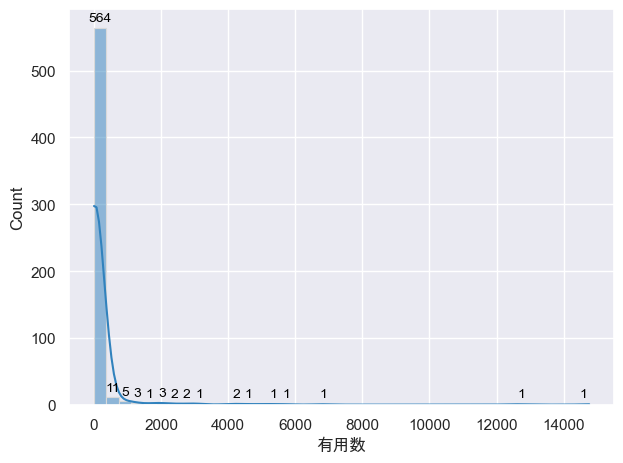

In [214]:
fig, axes = plt.subplots(1, 1, num="useful")
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20c')
print(f"{palette.colors} {len(palette.colors)}")
plt.subplot(1, 1, 1)
ax1 = sns.histplot(df_date["有用数"], kde = True, bins = 40, shrink = 1, color = palette.colors[0], edgecolor = palette.colors[-1])#"none")#, element="step")# element = "poly") # cumulative = True)
# 给直方图添加文字注释
for p in ax1.patches:
    if p.get_height() > 0:
        ax1.annotate(
            text=f"{p.get_height():1.0f}",
            xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
            xycoords='data',
            ha='center', 
            va='center', 
            fontsize=10, 
            color='black',
            xytext=(0,7), 
            textcoords='offset points',
            clip_on=True,               
        )

plt.tight_layout()
plt.show()

## Sentiment analysis

In [131]:
from cnsenti import Sentiment

In [132]:
senti = Sentiment()

In [152]:
top5.iloc[1]['评论内容']

'很庆幸星爵没有和卡魔拉在一起，如果在一起，那就证明星爵从未爱过卡魔拉。几乎完美的结局，导演尊重了每一位银河护卫队成员，主创把这些角色当作了独立的人看待，而不是服务剧情的工具人。'

In [153]:
senti.sentiment_calculate(top5.iloc[1]['评论内容'])

{'sentences': 2, 'words': 58, 'pos': 138.0, 'neg': 27.0}

In [159]:
senti_tag=[]
for i in range(df_date.shape[0]):
    text = df_date.iloc[i]['评论内容']
    dict_list=senti.sentiment_calculate(text)
    if dict_list['pos']>dict_list['neg']:senti_tag.append('积极')
    elif dict_list['pos']==dict_list['neg']:senti_tag.append('中性')
    else:senti_tag.append('消极')

In [161]:
df_date['sentiment']=pd.Series(senti_tag)

In [162]:
df_date

,页码,评论者昵称,评论星级,评论时间,评论者IP属地,有用数,评论内容,sentiment
0,1,朝暮雪,4星,2023-05,四川,14762,《银护1》22：04出现过水獭的名字莱拉。至高进化给她装了机械臂，《复联3》火箭浣熊想要得到...,消极
1,1,黑特-007,4星,2023-05,北京,5179,银护系列将因为发挥稳定而被踢出漫威宇宙，虽然我觉得为了讲火箭身世完全可以走迷你剧没必要又水一...,消极
2,1,R人民艺术家,4星,2023-05,美国,4077,动森岛建不理想只能炸岛害,积极
3,1,Agent阿神,5星,2023-04,山东,12554,很庆幸星爵没有和卡魔拉在一起，如果在一起，那就证明星爵从未爱过卡魔拉。几乎完美的结局，导演尊...,积极
4,1,睦谊日东,5星,2023-05,韩国,6827,我就说最后一部高低得把第一部里面最经典的那首歌再放一次，果然给了，赞！,中性
...,...,...,...,...,...,...,...,...
595,30,寒狐传媒,4星,2023-07,浙江,0,每个角色都不错。,中性
596,30,M2,4星,2023-05,北京,0,近期漫威电影最佳。火箭的背景故事感人，多个长镜头动作场面华丽流畅，笑点与泪点分布舒适。缺点是...,消极
597,30,一顿8汉堡,5星,2023-05,江苏,2,我爱火箭浣熊,中性
598,30,Hi Friday,5星,2023-05,广东,1,还可以，四星电影吧，给五星情怀分了。很美好，看的还挺爽，甚至有的地方落泪了。虽然这反派还是有...,积极


In [166]:
df_senti=df_date.groupby(['sentiment'])['sentiment'].count()

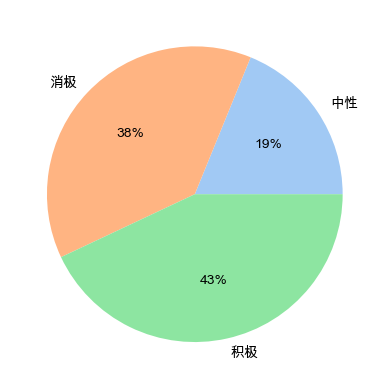

In [168]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_senti, labels = df_senti.index.tolist(), colors = colors, autopct='%.0f%%')
plt.show()

In [171]:
df_senti_star=df_date[df_date['sentiment']=='积极'].groupby(['评论星级'])['评论星级'].count()

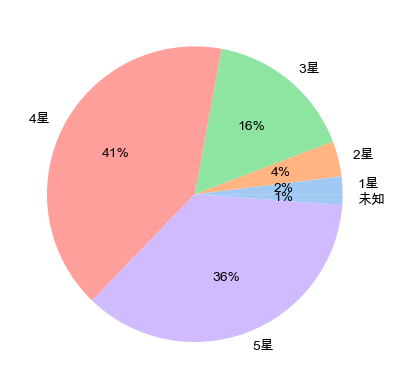

In [172]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_senti_star, labels = df_senti_star.index.tolist(), colors = colors, autopct='%.0f%%')
plt.show()

In [179]:
df_pos=df_date[df_date['sentiment']=='积极'].reset_index(drop=True)

In [180]:
df_pos

,页码,评论者昵称,评论星级,评论时间,评论者IP属地,有用数,评论内容,sentiment
0,1,R人民艺术家,4星,2023-05,美国,4077,动森岛建不理想只能炸岛害,积极
1,1,Agent阿神,5星,2023-04,山东,12554,很庆幸星爵没有和卡魔拉在一起，如果在一起，那就证明星爵从未爱过卡魔拉。几乎完美的结局，导演尊...,积极
2,1,理易封,4星,2023-05,辽宁,4198,第四+第五阶段目前最佳，感觉像一只摇滚乐队的解散演唱会，每个人物都照顾到了，真的family...,积极
3,1,我是猪Pigangel,4星,2023-05,广东,2881,【银河护卫队3（8.0/10）】吊打《复联4》的完结篇。冈导是漫威影业唯一一位完整执导三部曲...,积极
4,1,琦殿,未知,2023-05,山东,1799,“他是我们中唯一一个不讨厌自己的人。”,积极
...,...,...,...,...,...,...,...,...
253,30,03Sanders,3星,2023-05,内蒙古,2,古恩可算是知道最后一部了，把恶趣味和合家欢揉一块玩了，割裂程度还能接受。总部那块让人想买设定...,积极
254,30,drunkenstain,4星,2023-05,四川,1,1.反地球的dystopia的设定真的很惊艳/吓到我，这一季的世界观和设定甚至比前作更精彩，...,积极
255,30,瑶瑶,4星,2023-09,辽宁,0,很温馨很感人，保护全物种还是蛮升华了。真的差点以为星爵要死掉，哈哈。“好人团”每个人都有优点...,积极
256,30,U 兔,3星,2023-07,山东,0,不知道为啥，有点看不下去这些buddy情谊了，就觉得比较浅，看的时候总是会不自觉露出一种“好...,积极


In [181]:
textall_pos=''
for i in range(df_pos.shape[0]):
    tmplist=split_text(text = df_pos.iloc[i]['评论内容'])
    for item in tmplist:
        textall_pos+=item
        textall_pos+=','

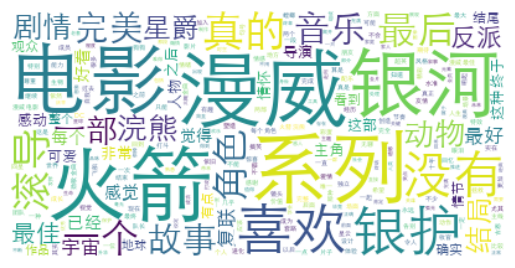

In [183]:
draw_wordcloud(text = textall_pos)  

In [184]:
df_normal=df_date[df_date['sentiment']=='中性'].reset_index(drop=True)

In [185]:
df_normal

,页码,评论者昵称,评论星级,评论时间,评论者IP属地,有用数,评论内容,sentiment
0,1,睦谊日东,5星,2023-05,韩国,6827,我就说最后一部高低得把第一部里面最经典的那首歌再放一次，果然给了，赞！,中性
1,1,Aslp_,5星,2023-05,北京,5609,众所周知，滚导宇宙和MCU毫不相干，早已是nextlevel。,中性
2,1,leslie1991,4星,2023-05,上海,1095,滚导最后一部了，满满的情怀，也不蹭复联热度，单纯就是银河护卫队的电影。某个角色死了，观众：嗯...,中性
3,2,baobaodu,4星,2023-05,北京,848,火箭浣熊成长史，养宠物的看了估计都会泪目,中性
4,2,北辰,4星,2023-09,广东,1,看了复联3过来的，表示人都全凉了，怎么拍？,中性
...,...,...,...,...,...,...,...,...
108,30,обломов,4星,2023-07,江苏,0,火箭，重生之我当一把手,中性
109,30,福禄恩特,5星,2023-05,上海,4,鉴定为好的爆米花,中性
110,30,FeiY,4星,2023-05,北京,1,captainRocketRaccoon，it'syourturnnow!,中性
111,30,寒狐传媒,4星,2023-07,浙江,0,每个角色都不错。,中性


In [188]:
textall_normal=''
for i in range(df_normal.shape[0]):
    tmplist=split_text(text = df_normal.iloc[i]['评论内容'])
    for item in tmplist:
        textall_normal+=item
        textall_normal+=','

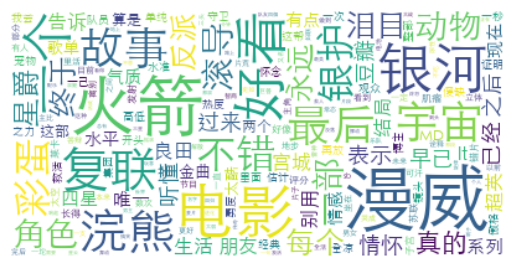

In [189]:
draw_wordcloud(text = textall_normal) 